In [1]:
import numpy as np
from numpy.random import multivariate_normal as mvnrnd
import matplotlib.pyplot as plt
import control

In [2]:
# System Description
a = np.array([[0.8,0.2],[-0.5,0.9]])
b = np.array([[1],[0]])
c = np.array([[-0.12,0.06]])
d = np.array([[0]])
n, m = b.shape  # State-vector and control sizes
p = c.shape[0]  # Output vector size

T = np.arange(0, 100)  # Time points for simulation
x0 = np.array([[-3], [3]])

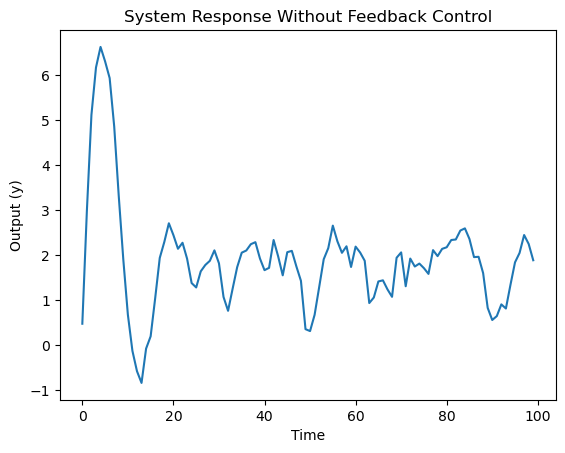

In [35]:
# Simulation Without Control
x = x0.copy()
u = np.array([[2]])
xs = []
ys = []

# process noise
Bnoise = np.eye(n)  # Process noise enters directly on states
W = 0.1 * np.eye(n)  # Process noise weight

for i in T:
    
    # update x
    process_noise = mvnrnd(np.zeros(n), W).reshape(-1,1)
    x1 = a @ x + b @ u + Bnoise @ process_noise
    x = x1.copy()

    # output
    y = c @ x + d @ u
    
    # save
    xs.append(x)
    ys.append(y.item())

# Plot the output 'ys'
x1s = [x[0].item() for x in xs]
# lt.plot(T, ys)
plt.plot(T, x1s)
plt.xlabel('Time')
plt.ylabel('Output (y)')
plt.title('System Response Without Feedback Control')
plt.show()

### Time variant Kalman Filter

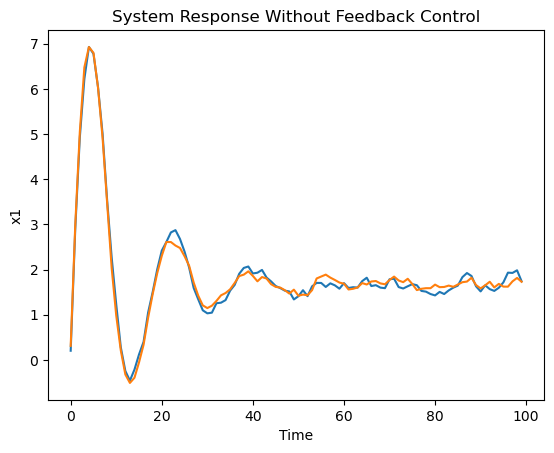

In [36]:
# Design Kalman Filter
Bnoise = np.eye(n)  # Process noise enters directly on states
W = 0.01 * np.eye(n)  # Process noise weight
V = 0.001 * np.eye(m)  # Measurement noise weight

x = x0.copy()
xhat = x0.copy()
Phat = W.copy()
u = np.array([[2]])
xs = []
ys = []
xhats = []
yress = []
for i in T:

    # Update x
    process_noise = mvnrnd(np.zeros(n), W).reshape(-1,1)
    x1 = a @ x + b @ u + Bnoise @ process_noise
    x = x1.copy()

    # Output
    measurement_noise = mvnrnd(np.zeros(p), V).reshape(-1,1)
    y = c @ x + d @ u + measurement_noise

    # Save
    xs.append(x)
    ys.append(y.item())

    # Kalman
    xpred = a @ xhat + b @ u
    Ppred = a @ Phat @ a.T + W
    ypred = c @ xpred

    S = c @ Ppred @ c.T + V
    Kf = Ppred @ c.T @ np.linalg.inv(S)

    xhat = xpred + Kf @ (y - ypred)
    phat = Ppred - Kf @ c @ Ppred
    yres = y - c @ xhat

    xhats.append(xhat)
    yress.append(yres.item())

# Plot the state
x1s = [x[0].item() for x in xs]
xhat1s = [x[0].item() for x in xhats]
# lt.plot(T, ys)
plt.plot(T, x1s)
plt.plot(T, xhat1s)
# plt.plot(T, yress)
plt.xlabel('Time')
plt.ylabel('x1')
plt.title('System Response Without Feedback Control')
plt.show()

### Time invariant Kalman Filter

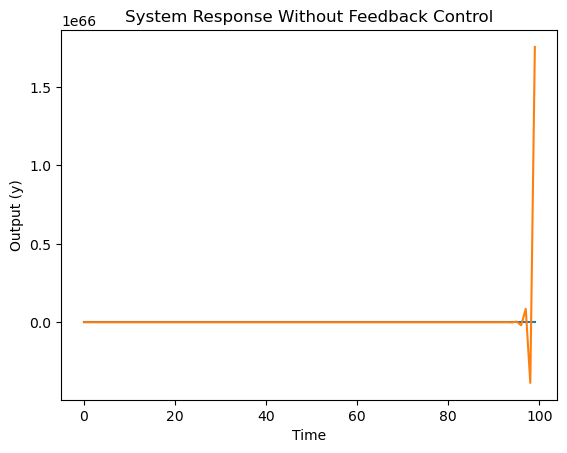

In [37]:
# FIXME
# Design Kalman Filter
Bnoise = np.eye(n)  # Process noise enters directly on states
W = 0.1 * np.eye(n)  # Process noise weight
V = 0.1 * np.eye(m)  # Measurement noise weight
Kf, _, _ = control.lqe(a, Bnoise, c, W, V)

x = x0.copy()
xhat = x0.copy()
u = np.array([[2]])
xs = []
ys = []
xhats = []
for i in T:

    # Update x
    process_noise = mvnrnd(np.zeros(n), W).reshape(-1,1)
    x1 = a @ x + b @ u + Bnoise @ process_noise
    x = x1.copy()

    # Output
    measurement_noise = mvnrnd(np.zeros(p), V).reshape(-1,1)
    y = c @ x + d @ u + measurement_noise

    # Save
    xs.append(x)
    ys.append(y.item())

    # Kalman
    xpred = a @ xhat + b @ u
    ypred = c @ xpred

    x1hat = xpred + Kf @ (y - ypred)
    xhat = x1hat.copy()

    xhats.append(xhat)

# Plot the output 'ys'
x1s = [x[0].item() for x in xs]
xhat1s = [x[0].item() for x in xhats]
# lt.plot(T, ys)
plt.plot(T, x1s)
plt.plot(T, xhat1s)
plt.xlabel('Time')
plt.ylabel('Output (y)')
plt.title('System Response Without Feedback Control')
plt.show()